## Wprowadzenie do PyTorch


PyTorch jest frameworkiem opartym na grafach dynamicznych umożliwiający obliczenia na gpu.



Jednym z najważniejszych pakietw w PyTorch jest pakiet *Autograd *(AUTOMATIC DIFFERENTIATION) https://pytorch.org/docs/stable/autograd.html

Zawiera klasy i funkcje umożliwiające obliczanie pochodnych funkcji.

Tensory
https://pytorch.org/docs/stable/tensors.html podstawowa klasa w pakiecie autograd, przypomina tablice w Numpy, ale umożliwia operacje z wykorzystaniem GPU

więcej:https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#getting-started

In [4]:
import torch
import numpy as np

ModuleNotFoundError: No module named 'torch'

### W numpy:
operacje wykonywane są na skalarach ,tablicach...

In [0]:
# przykładowy skalar
i=np.int(10)
i

10

In [0]:
#przykładowa macierz -tablica 2 wymiarowa

matrix = np.array([[3,2],[7,1]])
print(matrix)
print(matrix.shape)

[[3 2]
 [7 1]]
(2, 2)


In [0]:
#przykładowy tensor -tablica wielowymiarowa

tensor = np.array([[[3,1,0],[2,1,1]],[[7,1,2],[1,1,3]]])
print(tensor)
print(tensor.shape)

[[[3 1 0]
  [2 1 1]]

 [[7 1 2]
  [1 1 3]]]
(2, 2, 3)


### W PyTorch 
podstawowym obiektem jest tensor

In [0]:
torch.empty(5, 3) # tensor o określonym wymiarze

tensor([[6.8105e-36, 0.0000e+00, 4.4842e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [2.1121e+20, 1.3614e-05, 8.4482e+20],
        [2.0776e+20, 4.3676e-05, 8.4490e+20],
        [8.2297e-10, 8.4275e-07, 5.0948e-14]])

In [0]:
torch.rand(5,3) #losowe dane w tensorze

tensor([[0.2945, 0.5546, 0.0480],
        [0.5255, 0.5651, 0.6609],
        [0.5721, 0.5728, 0.9370],
        [0.6574, 0.0890, 0.8619],
        [0.9190, 0.6834, 0.0633]])

In [0]:
z=torch.zeros(5, 3) # określanie typu danych w tensorze
print(z)
z=torch.zeros(5, 3,dtype=torch.int) # określanie typu danych w tensorze
print(z)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)


In [0]:
x_numpy=np.array([5.5,3])
x = torch.tensor(x_numpy) # tensor z tablicy numpy
print(x)

tensor([5.5000, 3.0000], dtype=torch.float64)


In [0]:
print(x[0]) #pierwszy element jako tensor 
print(x[0].item()) #... skalar
print(type(x[0].item()))

tensor(5.5000, dtype=torch.float64)
5.5
<class 'float'>


In [0]:
#Działania na tensorach

y = torch.ones(2,3)
print(y)
print(y*2)
print(y+5)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]])


In [0]:

y = torch.arange(1,7)

print(y)
print(y.shape)

#zmiana wymiarów
y1=y.view(2,-1)
print("------------y1")
print(y1)
print(y1.shape)

y2=y.view(3,2)
print("------------y2")
print(y2)
print(y2.shape)

y3=y.view(-1,2,3)
print("------------y3")
print(y3)
print(y3.shape)

tensor([1, 2, 3, 4, 5, 6])
torch.Size([6])
------------y1
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])
torch.Size([6, 1])
------------y2
tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])
------------y3
tensor([[[1, 2, 3],
         [4, 5, 6]]])
torch.Size([1, 2, 3])


In [0]:
print(y.shape)
print("------------y4")
y4=y.unsqueeze(1)
print(y4)
print(y4.shape)

print("------------y5")
y5=y.unsqueeze(0)
print(y5)
print(y5.shape)
print(y5.squeeze().shape)

torch.Size([6])
------------y4
tensor([1, 2, 3, 4, 5, 6])
torch.Size([6])
------------y5
tensor([[1, 2, 3, 4, 5, 6]])
torch.Size([1, 6])
torch.Size([6])


In [0]:
y6=y.view(3,-1)
print(y6)
print(y6.transpose(0,1))

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 3, 5],
        [2, 4, 6]])


In [0]:
print(y6.T.shape)

y6.shape

torch.Size([2, 3])


torch.Size([3, 2])

## Gradienty w pyTorch
Ustwiając argument tensora requires_grad jako True, umożliwione jest rejestrowanie operacji wykonywanych na tym tensorze podczas obliczania gradientów. Wywołując metodę .backward() możemy automatycznie policzyć gradient dla zadanej zmiennej. Atrybut .grad przechowuje gradient dla danego tensora.

In [0]:
#tensor o wymarze [2]
x = torch.tensor((1., 2., 3.), requires_grad = True) 
print(x)


tensor([1., 2., 3.], requires_grad=True)


In [0]:
y = 3 * torch.pow(x+1,2) + x+2
print(y)

tensor([15., 31., 53.], grad_fn=<AddBackward0>)


In [0]:
y.backward(x)

RuntimeError: ignored

In [0]:
x.grad

tensor([13., 38., 75.])

Powyższe obliczenia:
$y=3(x+1)^2+x+2$, 

$\frac{\partial y_i}{\partial x_i} = 6(x_i+1)+1$,

a więc dla $x_1=1$ $y_1=13$ oraz $x_2=1$ $y_2=38$



#### TorchVIZ

In [0]:
!pip install torchviz

     |████████████████████████████████| 51kB 3.3MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3523 sha256=1432cd9bab992d9b3f3fd19983faab427cf58bb91190a5674778ccee8470addc
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


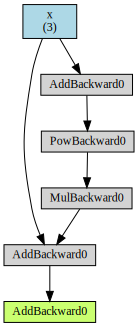

In [0]:
from torchviz import *

make_dot(y, params={"x":x})

In [0]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)

x_train=np.array([0,1,2,3,4,5,6])
y_train=np.array([5,10,15,21,26,30,34])

x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()


yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

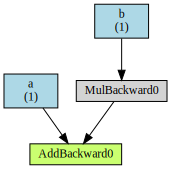

In [0]:
make_dot(yhat, params={"a":a, "b":b})



### Zadanie 1.
Korzystając z pyTorch oblicz gradient dla $z=y^2+(y+1)^2$, $y=x^2$ , x=[[ 1., 2., 3.], [4., 5., 6.]] i utwórz wizualizację grafu obliczeń.




In [0]:
x_array = np.array([[ 1., 2., 3.], [4., 5., 6.]])
x = torch.tensor(x_array, requires_grad = True) 
y = torch.pow(x, 2)
z = torch.pow(y, 2) + torch.pow(y+1, 2)

print(y)
print(z)

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]], dtype=torch.float64, grad_fn=<PowBackward0>)
tensor([[   5.,   41.,  181.],
        [ 545., 1301., 2665.]], dtype=torch.float64, grad_fn=<AddBackward0>)


In [0]:
y.backward(x, retain_graph=True)
x.grad

tensor([[ 2.,  8., 18.],
        [32., 50., 72.]], dtype=torch.float64)

In [0]:
z.backward(y) 
x.grad

tensor([[1.4000e+01, 2.9600e+02, 2.0700e+03],
        [8.4800e+03, 2.5550e+04, 6.3144e+04]], dtype=torch.float64)

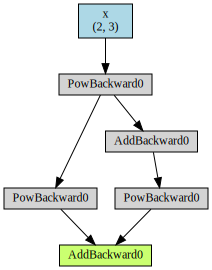

In [0]:
make_dot(z, params={"x":x, "y":y})

### Zadanie 2

Mając podaną wizualizaję grafu obliczeń, utwórz odpowiednie zmienne i wykonaj takie obliczenia w pytorch aby go odtworzyć. (Dowolne wartości)

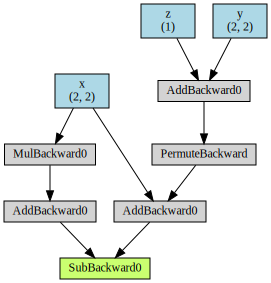

In [0]:
make_dot(out, params={"x":x, "z":z, "y":y})

In [0]:
z = torch.randn(1, requires_grad=True, dtype=torch.float)
y = torch.randn(2,2, requires_grad=True, dtype=torch.float)
x = torch.randn(2,2, requires_grad=True, dtype=torch.float)

out = ((x*2)+1) - (x + (y+z).T)

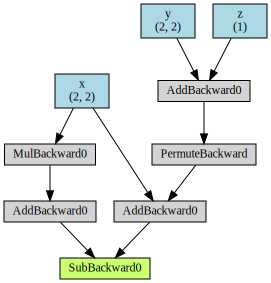

In [0]:
make_dot(out, params={"x":x, "z":z, "y":y})

# Modele w Pytorch na przykładzie regresji liniowej


In [8]:

from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(boston['data'][:,5], dtype=np.float32),np.array( boston['target'], dtype=np.float32), test_size=0.3, random_state=0)

print(X_train[:10])
print(y_train[:10])

[5.019 6.538 6.335 6.345 5.961 6.142 5.594 5.57  6.152 6.096]
[14.4 24.4 18.1 22.5 20.5 15.2 17.4 13.6  8.7 18.2]


Klasa modelu w pyTorch.

Dziedziczy po nn.Module

Zwykle conajmniej dwie metody:
- init - tutaj iicjalizujemy warstwy etc
- forward - tutaj wykonujemy obliczenia i zwracamy wynik

In [0]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)  #jedna warstwa modelu - liniowa

    def forward(self, x):
        out = self.linear(x) #obliczanie wyjścia
        return out

In [0]:
#funkcja kosztu, którą będziemy minimalizować

criterion = nn.MSELoss()

In [0]:
torch.manual_seed(0)

#ustalenie wymiarów danych wejściowych oraz wyjścia
input_dim = 1 # rozmiar wejścia
output_dim = 1 # rozmiar wyjścia -  będzie to 1 bo chcemy otrzymać jedną wartość liczbową

#utworzenie obiektu modelu regrsji liniowej
model = LinearRegressionModel(input_dim, output_dim)


#Ustalenie metody optymalizacji, tutaj SGD, oraz jej parametrów

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
#trenowanie modelu

epochs = 20
for epoch in range(epochs):
    epoch += 1
    # konwersja tablicy numpy na tensory o odpowiednich wymiarach
    inputs = torch.from_numpy(X_train).view(-1,1)#.unsqueeze(1)
    #print(inputs)
    labels = torch.from_numpy(y_train)

    # Czyszczenie gradientów
    optimizer.zero_grad() 

    # oblicznie wyjścia (w grafie obliczeń: od początku do końca)
    outputs = model(inputs)

    # Obliczanie błedu
    loss = criterion(outputs, labels.unsqueeze(1))

    # Obliczanie gradientów dla parametrów (od końca do początku)
    loss.backward()

    # Aktualizacja parametrów
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 580.1744384765625
epoch 2, loss 74.79080963134766
epoch 3, loss 59.39674758911133
epoch 4, loss 58.92034149169922
epoch 5, loss 58.898101806640625
epoch 6, loss 58.88969802856445
epoch 7, loss 58.8817138671875
epoch 8, loss 58.87375259399414
epoch 9, loss 58.86579895019531
epoch 10, loss 58.85783386230469
epoch 11, loss 58.849884033203125
epoch 12, loss 58.841941833496094
epoch 13, loss 58.83399963378906
epoch 14, loss 58.8260498046875
epoch 15, loss 58.818111419677734
epoch 16, loss 58.810176849365234
epoch 17, loss 58.802249908447266
epoch 18, loss 58.79433059692383
epoch 19, loss 58.78640365600586
epoch 20, loss 58.77849197387695


### Zadanie 3
Narysuj graf dla powyższych obliczeń (uwzględnij loss). Aby uzyskać nazyw parametrów modelu wykorzystaj model.named_paramters(). 

Które zmienne są, a które nie są wyświetlane (zapisz odpowiedź)?

In [0]:
for name in model.named_parameters():
  print(name)

('linear.weight', Parameter containing:
tensor([[3.5309]], requires_grad=True))
('linear.bias', Parameter containing:
tensor([0.9102], requires_grad=True))


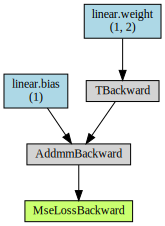

In [0]:
make_dot(loss, params={"linear.weight":model.linear.weight, "linear.bias":model.linear.bias, "outputs":outputs})

Nie ma w wyświetlanych parametrach output-u, optimizera


### Zadanie 4

Dla danych testowych narysuj wykres przedstawiający predykcję cen wykonaną przez model oraz ceny rzeczywiste zależne od liczby pokoi.

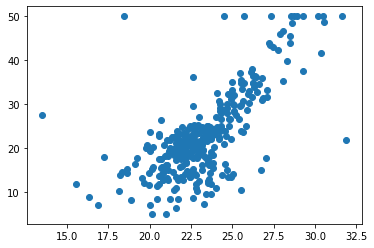

In [15]:
import matplotlib.pyplot as plt

plt.scatter(outputs.detach().numpy(), labels.detach().numpy())

## Zadanie 5 
Utwórz model regresji liniowej(korystając z powyższego), która dokona predykcji cen na podstawie 2 atrybutów: 4 i 5. Czy coś zmieni się w grafie obliczeń?

In [3]:
#from sklearn.model_selection  import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(np.array(boston['data'][:,[4,5]], dtype=np.float32),np.array( boston['target'], dtype=np.float32), test_size=0.3, random_state=0)
import numpy as np
X_train=np.array([[10,11], [20,30], [5,4], [8,20], [22, 10], [9, 10], [5, 17], [5, 50], [50,5], [3,4], [6,7], [-10,10], [-10,1]])
y_train=np.array([0,1, 0, 1, 0, 0, 1,1,0,0,0, 1,1])

print(X_train[:10])
print(y_train[:10])

#funkcja kosztu, którą będziemy minimalizować

criterion = nn.MSELoss()

torch.manual_seed(0)

#ustalenie wymiarów danych wejściowych oraz wyjścia
input_dim = 2 # rozmiar wejścia
output_dim = 1 # rozmiar wyjścia -  będzie to 1 bo chcemy otrzymać jedną wartość liczbową

#utworzenie obiektu modelu regrsji liniowej
model = LinearRegressionModel(input_dim, output_dim)


#Ustalenie metody optymalizacji, tutaj SGD, oraz jej parametrów

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#trenowanie modelu

epochs = 20
for epoch in range(epochs):
    epoch += 1
    # konwersja tablicy numpy na tensory o odpowiednich wymiarach
    inputs = torch.from_numpy(X_train)#.unsqueeze(1)
    #print(inputs)
    labels = torch.from_numpy(y_train)

    # Czyszczenie gradientów
    optimizer.zero_grad() 

    # oblicznie wyjścia (w grafie obliczeń: od początku do końca)
    outputs = model(inputs)

    # Obliczanie błedu
    loss = criterion(outputs, labels.unsqueeze(1))

    # Obliczanie gradientów dla parametrów (od końca do początku)
    loss.backward()

    # Aktualizacja parametrów
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.item()))

[[10 11]
 [20 30]
 [ 5  4]
 [ 8 20]
 [22 10]
 [ 9 10]
 [ 5 17]
 [ 5 50]
 [50  5]
 [ 3  4]]
[0 1 0 1 0 0 1 1 0 0]


NameError: name 'nn' is not defined

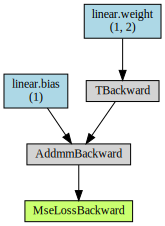

In [0]:
make_dot(loss, params={"linear.weight":model.linear.weight, "linear.bias":model.linear.bias, "outputs":outputs})

Na grafie się nic nie zmieniło.

